# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Telecom Customer churn prediction

<span style="font-family: Arial;font-size:1.2em;color:#3366ff">Objective:-

* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Predict the Telecom customer who is going churn in near future

<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Index
</p>
</div>

# Index
* <a href="#Packages">1.1.Packages</a>
* <a href="#EDA">1.2.EDA</a>
* <a href="#Tableau-Dashboard">1.3.Tableau Dashboard</a>
* <a href="#Preprocessing">1.4.Preprocessing</a>
* <a href="#Modeling">1.5.Modeling</a>
* <a href="#Permutation-Importance">1.6.Permutation Importance</a>
* <a href="#Model-comparison">1.7.Model comparison</a>
* <a href="#Reference">1.8.Reference</a>

<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Packages
</p>
</div>

# Packages

In [1]:
# packages
import numpy as np # linear algebra
import pandas as pd # data processing

# plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# display HTML, Js apps
from IPython.core.display import display, HTML, Javascript

# scaling
from sklearn.preprocessing import StandardScaler

# SMOTE
from imblearn.over_sampling import SMOTE

# keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# model Evaluation
from sklearn import metrics
 
# model explainablity
import eli5
from eli5.sklearn import PermutationImportance

# plotly offline
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)

# MISC
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
df = pd.read_csv('../input/telecom-users-dataset/telecom_users.csv',index_col=0)

In [3]:
# drop unnamed column
df = df.reset_index()
df = df.drop(['index','customerID'],axis=1)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Exploratory data analysis
</p>
</div>

# EDA

In [5]:
# stats
df[df['Churn']=='Yes'][['tenure','MonthlyCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1587.0,18.246377,19.667262,1.00,2.000,10.0,30.0,72.00
MonthlyCharges,1587.0,74.164871,24.965002,18.85,55.675,79.5,94.4,118.35


In [6]:
# stats 
df[df['Churn']=='No'][['tenure','MonthlyCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,4399.0,37.599682,24.065131,0.00,15.000,37.00,61.0,72.00
MonthlyCharges,4399.0,61.424506,31.086101,18.25,25.125,64.75,88.7,118.75


## Insights
* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">if we closely observe the Monthly charges mean of 74.16 and median of 79.5 for customers who are churned
* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">if we compare with the Monthly charges mean of 61.42 and median of 64.75 for customers who are not churned
* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">we can see that monthly charges of churned customers are higher than the customers who not churn

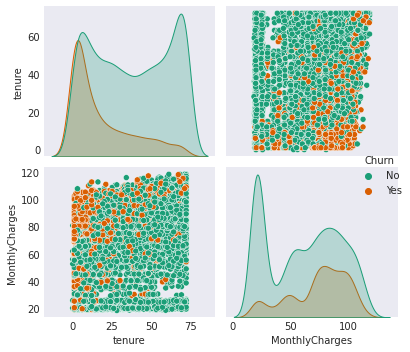

In [7]:
# pairplot
plt.style.use('seaborn-dark')
sns.pairplot(df[['tenure','MonthlyCharges','Churn']],hue='Churn',palette='Dark2');
plt.tight_layout();

In [8]:
# Churn
churn_plot = df['Churn'].value_counts().reset_index()
churn_plot.columns = ['Churn?',"Number_of_customers"]

# plot
px.pie(churn_plot,values ="Number_of_customers",names='Churn?',title='Churn',template='none')

### In the above pie chart we can see that there is a class imbalance in data set, instance of chrun is only 26.5% and normal is 73.5%

## 

<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Tableau Dashboard
</p>
</div>

# Tableau Dashboard

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1617687716045' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='useGuest' value='true' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1617687716045');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='2400px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">If we click yes filter the churned customer on the above tableau dashboard we can observe that most of the Monthly charges are higher than the existing customers
* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">If we observe closely we can see that Internet service Fiber Optic user are most who left the telecom service and out of 2627 Fiber optic users 1091 Fiber optic users 41% are left the telecom service


In [10]:
# churn Fiber optic users
print('Total Fiber optic users',df[df['InternetService'] =='Fiber optic']['InternetService'].count())
print('\n')
print('No. of Fiber optic users Not Churn',df[(df['Churn'] =='No')& (df['InternetService'] =='Fiber optic')]['InternetService'].count())
print('\n')
print('No. of Fiber optic users Churned',df[(df['Churn'] =='Yes')& (df['InternetService'] =='Fiber optic')]['InternetService'].count())

Total Fiber optic users 2627


No. of Fiber optic users Not Churn 1536


No. of Fiber optic users Churned 1091


In [11]:
print('Median monthly charges of staying customers',df[(df['Churn'] =='No')& (df['InternetService'] =='Fiber optic')]['MonthlyCharges'].median())
print('Median monthly charges of churned customers',df[(df['Churn'] =='Yes')& (df['InternetService'] =='Fiber optic')]['MonthlyCharges'].median())

Median monthly charges of staying customers 94.75
Median monthly charges of churned customers 87.4


In [12]:
%%HTML
<div class='tableauPlaceholder' id='viz1617689871779' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_2' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecom_Customer_Churn_prediction&#47;Telecom_churn_dashboard_2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1617689871779');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='2400px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Preprocessing
</p>
</div>

# Preprocessing

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">i. Missing Values 

In [13]:
# missing values
missing_value = 100* df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']
missing_value = missing_value.sort_values('missing values in percentage',ascending=False)

# barplot
fig = px.bar(missing_value, y='missing values in percentage',x='variables',title='Missing values % in each column',
             template='ggplot2',text='missing values in percentage');
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">No missing values found in the dataset but we need to search for empty string and spaces

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">ii. Data cleaning

In [14]:
# categorical columns

cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']

In [15]:
# numerical columns

num_columns = ['TotalCharges','MonthlyCharges','tenure']

In [16]:
#"""

for feature in df[cat_columns].columns:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('1. Unique vlaues:',df[feature].unique())
    print(' ')
    print('2. Min values:',df[feature].min())
    print(' ')
    print('3. value counts:',df[feature].value_counts(1)*100)
    print(' ')
    print('**************************************************')
    print('***************-end-******************************')
    print('\n ')

#"""


 
************* Column name: gender *************
1. Unique vlaues: ['Male' 'Female']
 
2. Min values: Female
 
3. value counts: Male      50.952222
Female    49.047778
Name: gender, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: SeniorCitizen *************
1. Unique vlaues: [0 1]
 
2. Min values: 0
 
3. value counts: 0    83.862345
1    16.137655
Name: SeniorCitizen, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: Partner *************
1. Unique vlaues: ['Yes' 'No']
 
2. Min values: No
 
3. value counts: No     51.486803
Yes    48.513197
Name: Partner, dtype: float64
 
**************************************************
***************-end-******************************

 

 
************* Column name: Dependents *************
1. Unique vlaues: ['Yes' 'No']
 
2. Min values: No
 


In [17]:
# num., columns

for feature in df[num_columns].columns:
    print('*******','Column name:',feature,'*******')
    
    print('Min values:',df[feature].min())
    print('Max values:',df[feature].max())
    
    print('***********-end-***********')
    print('\n')

******* Column name: TotalCharges *******
Min values:  
Max values: 999.9
***********-end-***********


******* Column name: MonthlyCharges *******
Min values: 18.25
Max values: 118.75
***********-end-***********


******* Column name: tenure *******
Min values: 0
Max values: 72
***********-end-***********




In [18]:
# we found the empty space or empty string here 

df['TotalCharges'].min()

' '

In [19]:
# empty space rows in Totalcharges 

df[df['TotalCharges'] == df['TotalCharges'].min()][0:3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No


In [20]:
# replace empty space with median

df['TotalCharges'] =  df['TotalCharges'].replace(' ',2298.06)# replace empty string with median of total charges

In [21]:
# change data type to float

df['TotalCharges'] =  df['TotalCharges'].astype(float)

In [22]:
df[df['tenure']==0][0:3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,2298.06,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2298.06,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2298.06,No


In [23]:
# replacing zero with median
df['tenure'] =  df['tenure'].replace(0,29)

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">iii. Correlation

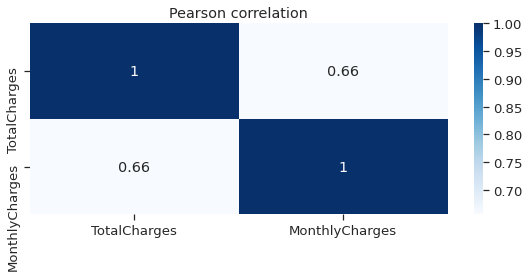

In [24]:
# plot
plt.figure(figsize=(8,4))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df[['TotalCharges','MonthlyCharges']].corr('pearson'),annot=True,cmap='Blues');
plt.title('Pearson correlation');
plt.tight_layout();

* <span style="font-family: Arial;font-size:1.1em;color:#3366ff">Monthly charges slightly positively correlated with total charges

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">ii. Data encoding

In [25]:
# convert categorical to numerical
for features in df[cat_columns].columns:
    df[features] = pd.Categorical(df[features]).codes 

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">iv. Outliers

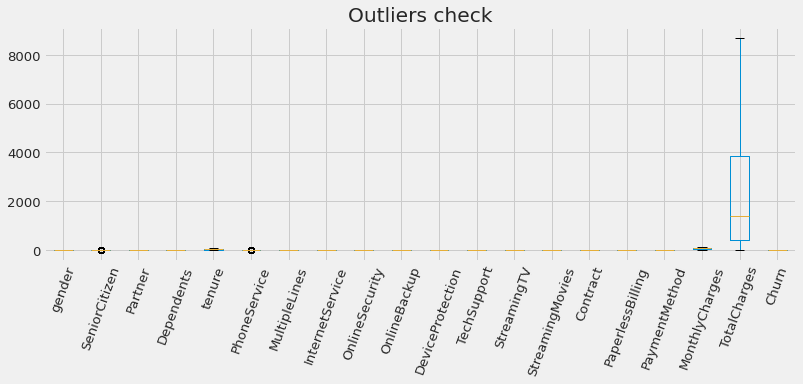

In [26]:
# plot outliers
plt.style.use('fivethirtyeight')
df.plot(kind='box',figsize=(12,4))
plt.xticks(rotation=70);
plt.title('Outliers check');

In [27]:
#"""
def treat_outlier(x):
    sorted(x)
    q1,q3=np.percentile(x,[25,75])
    iqr=q3-q1
    l_r=q1-(1.5*iqr)
    u_r=q3+(1.5*iqr)
    return l_r,u_r  
#"

In [28]:
#"""

for i in df[num_columns].columns:
    lr,ur = treat_outlier(df[i])
    df[i] = np.where(df[i]>ur,ur,df[i])
    df[i] = np.where(df[i]<lr,lr,df[i])
#"""

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">v. data split

In [29]:
X= df.drop('Churn',axis=1)
y= df.pop('Churn')

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state =1)

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">vi. Scaling

In [31]:
## Scaling data

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Vii. Oversampling

In [32]:
## SMOTE oversampling

SMOTE_oversample = SMOTE(random_state=1)
X_train,y_train = SMOTE_oversample.fit_resample(X_train, y_train.ravel())

<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Modeling
</p>
</div>

# Modeling

### for modeling we are going use 
* basic model
    * <span style="font-family: Arial;font-size:1.1em;color:#3366ff">Decision Tree
* bagging
    * <span style="font-family: Arial;font-size:1.1em;color:#3366ff">Random forest
* boosting
    * <span style="font-family: Arial;font-size:1.1em;color:#3366ff">XGboost


## i. Basic model
   * <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Decision Tree

Accuracy on Train set 0.7997716894977169
Accuracy on Test set 0.7
F1-score on Test set: 0.5714285714285713


              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.60      0.55      0.57        11

    accuracy                           0.70        30
   macro avg       0.68      0.67      0.67        30
weighted avg       0.70      0.70      0.70        30





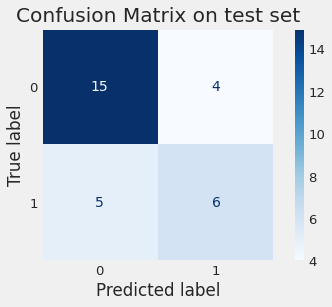

In [33]:
from sklearn.tree import DecisionTreeClassifier

DT_model= DecisionTreeClassifier(max_features= 5,max_depth= 10,min_samples_split= 90,min_samples_leaf= 30,random_state=1)

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))
print('\n')

# confusion matrix
metrics.plot_confusion_matrix(DT_model,X_test,y_test,cmap='Blues');
plt.grid(False)
plt.title('Confusion Matrix on test set');

## ii. bagging
   * <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Random Forest

Accuracy on Train set 0.8312785388127854
Accuracy on Test set 0.7
F1-score on Test set: 0.5714285714285713


              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.60      0.55      0.57        11

    accuracy                           0.70        30
   macro avg       0.68      0.67      0.67        30
weighted avg       0.70      0.70      0.70        30





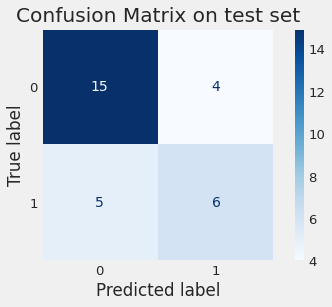

In [34]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

# create object model
RF_model = RandomForestClassifier(n_estimators= 600,min_samples_split= 90,min_samples_leaf= 20,
                                  max_features= 5,max_depth= 10)# RF model tuned

# fit the model
RF_model.fit(X_train,y_train)

# model score
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# accuracy score
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF)

print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)
print('F1-score on Test set:',RF_f1_score)
print('\n')
print(metrics.classification_report(y_test,predict_test_RF))
print('\n')

# confusion matrix
metrics.plot_confusion_matrix(RF_model,X_test,y_test,cmap='Blues');
plt.grid(False)
plt.title('Confusion Matrix on test set');

## iii. Boosting
 * <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Xgboost 

Accuracy on Train set 0.8337899543378996
Accuracy on Test set 0.7333333333333333
F1-score on Test set: 0.6363636363636364


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.64      0.64      0.64        11

    accuracy                           0.73        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.73      0.73      0.73        30





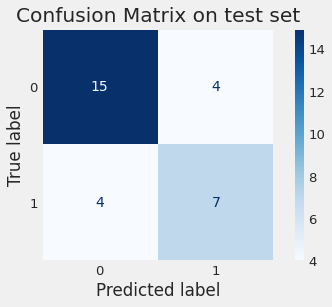

In [35]:
# Xgboost
import xgboost as xgb

# create object model
Xgboost_model = xgb.XGBClassifier(learning_rate=0.01,verbosity=0)

# fit the model
Xgboost_model.fit(X_train,y_train)

# model score
predict_train_Xgb = Xgboost_model.predict(X_train)
predict_test_Xgb = Xgboost_model.predict(X_test)

# accuracy score
Xgb_train_score = Xgboost_model.score(X_train,y_train)
Xgb_test_score = Xgboost_model.score(X_test,y_test)

# f1-score
Xgb_f1_score = metrics.f1_score(y_test,predict_test_Xgb)

print('Accuracy on Train set',Xgb_train_score)
print('Accuracy on Test set',Xgb_test_score)
print('F1-score on Test set:',Xgb_f1_score)
print('\n')
print(metrics.classification_report(y_test,predict_test_Xgb))
print('\n')

# confusion matrix
metrics.plot_confusion_matrix(Xgboost_model,X_test,y_test,cmap='Blues');
plt.grid(False)
plt.title('Confusion Matrix on test set');

<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Permutation Importance
</p>
</div>

# Permutation Importance

* <span style="font-family: Arial;font-size:1.1em;color:#3366ff">Permutation importance is stated to be the decrease in a model Accuracy or any user-defined metrics when a single Independent variable is randomly shuffled
* <span style="font-family: Arial;font-size:1.1em;color:#3366ff">This process followed for all the Independent variable and note down the Accuracy of the model when each Independent variable is shuffled and we can use any scoring metrics for this process to know what are feature given importance by the model

In [36]:
# permutation importance for Random forest model

import eli5
from eli5.sklearn import PermutationImportance

permutation = PermutationImportance(RF_model,random_state=1,scoring='f1').fit(X_test,y_test)# I use scoring as F1 score instead of accuracy
eli5.show_weights(permutation, feature_names = df.columns.tolist())

Weight,Feature
0.2122 ± 0.1299,Contract
0.0977 ± 0.1215,tenure
0.0156 ± 0.0254,TechSupport
0 ± 0.0000,gender
0 ± 0.0000,SeniorCitizen
0 ± 0.0000,PaperlessBilling
0 ± 0.0000,Partner
0 ± 0.0000,StreamingTV
0 ± 0.0000,DeviceProtection
0 ± 0.0000,Dependents


In [37]:
# permutation importance for Xgboost model

import eli5
from eli5.sklearn import PermutationImportance

permutation = PermutationImportance(Xgboost_model,random_state=1,scoring='f1').fit(X_test,y_test)# I use scoring as F1 score instead of accuracy
eli5.show_weights(permutation, feature_names = df.columns.tolist())

Weight,Feature
0.2006 ± 0.0641,Contract
0.1182 ± 0.1341,tenure
0.0381 ± 0.0910,InternetService
0.0241 ± 0.0478,OnlineSecurity
0.0217 ± 0.0399,PaymentMethod
0.0166 ± 0.0271,StreamingTV
0.0111 ± 0.0271,TechSupport
0.0055 ± 0.0221,OnlineBackup
0.0055 ± 0.0221,MonthlyCharges
0 ± 0.0000,PhoneService


<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Model Comparison
</p>
</div>

# Model comparison

* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">objective is to select model with good metrics, we can use metrics of F1 score and recall with good precision
* <span style="font-family: Arial;font-size:1.2em;color:#3366ff">f1 score is harmonic mean of precision and recall

In [38]:
models_list = [Xgboost_model,RF_model,DT_model]
recall =[]
precision =[]
test_acc = []
train_acc = []
f1score = []

for model in models_list:
    predict_test = model.predict(X_test)
    predict_train = model.predict(X_train)
    f1s = metrics.f1_score(y_test, predict_test)
    pre = metrics.precision_score(y_test, predict_test)
    rec = metrics.recall_score(y_test, predict_test)
    acc_test = model.score(X_test,y_test)
    acc_train = model.score(X_train,y_train)
    
    recall.append(rec)
    precision.append(pre)
    test_acc.append(acc_test)
    train_acc.append(acc_train)
    f1score.append(f1s)
    
model_compare = pd.DataFrame({
'Models':['Xgboost','Random_forest','Decision_Tree'],
'recall':recall,
'Precision':precision,
'f1score':f1score,
'Accuracy on Test':test_acc,
'Accuracy on Train':train_acc
})


In [39]:
model_compare.style.background_gradient(cmap='Blues')

,Models,recall,Precision,f1score,Accuracy on Test,Accuracy on Train
0,Xgboost,0.636364,0.636364,0.636364,0.733333,0.833790
1,Random_forest,0.545455,0.600000,0.571429,0.700000,0.831279
2,Decision_Tree,0.545455,0.600000,0.571429,0.700000,0.799772


*  <span style="font-family: Arial;font-size:1.2em;color:#3366ff">we can use Xgboost model for the prediction and it has balance of precision and recall

<div style="color:white;
           display:fill;
           border-radius:50px;
           background-color:#E8B60B;
           font-size:300%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:black;
          text-align:center;">Reference
</p>
</div>

# Reference

* https://xgboost.readthedocs.io/en/latest/tutorials/model.html
* https://www.kaggle.com/dansbecker/permutation-importance referred Permutation Importance from Dan Becker's Notebook
* Tableau Tutorial https://www.youtube.com/watch?v=6mBtTNggkUk

# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Thank you!!

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Feel free to post your suggestion